In [19]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,535 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and dire

In [39]:
from google.colab import files
uploaded = files.upload()

Saving age.csv to age (1).csv


찾고 싶은 지역명(행정구역코드)를 입력해주세요 : 정릉제3동
시작 나이와 끝 나이를 입력해주세요 : 30 50
[250, 279, 218, 177, 160, 172, 143, 143, 141, 117, 143, 173, 152, 170, 164, 133, 136, 139, 153, 183, 227]


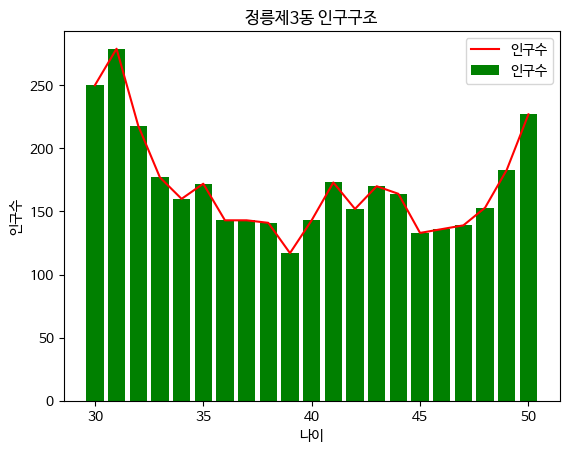

In [48]:
import csv
file = open('age.csv',encoding="cp949")
age = csv.reader(file)
result = []

area = input('찾고 싶은 지역명(행정구역코드)를 입력해주세요 : ')  # 중복 방지를 위해 행정코드 입력
start,end = map(int,input('시작 나이와 끝 나이를 입력해주세요 : ').split())

for i in age:
  if area in i[0]:
    for j in i[start+3:end+3+1]:  # 슬라이싱을 통해 원하는 데이터 추출
      result.append(int(j.replace(',','')))   # 정수형태로 변환 / 1000명 이상이 되면서 ',' 문자가 들어가기 때문에 replace로 교체
print(result)

# 시각화
import matplotlib.pyplot as plt # 모듈 불러오고 별칭 지정
plt.rc('font', family = 'NanumBarunGothic')
plt.title(area+' 인구구조')  # 그래프 이름
plt.plot(range(start,end + 1),result,color="red",label = "인구수")   # 함수에 데이터 입력 (자동으로 x축 범위 0 부터 생성 / 추가해도 상관은 없음)
plt.bar(range(start,end + 1),result,color='green',label = '인구수')  # x축 범위 직접적으로 입력
plt.ylabel('인구수')  # y축 이름
plt.xlabel('나이')  # x축 이름
plt.legend()  # 범계(데이터 알아보기 쉽게 설정)
plt.show()  # 불필요한 문장 삭제